In [1]:
import json
import matplotlib.pylab as plt
import numpy as np
import os

import lib.helper as hl
import lib.cell_plot as cplt

% matplotlib inline

In [4]:
# plotting current at the synapse(s) of a cell from cell_file

region_type = 'hippocamp'
neuron_type = 'exc'
current_dir = os.getcwd()
dir_name = os.path.join(current_dir, 'data', 'results')
file_name = '2018_12_5_14_1_all'
cell_file = 'c10861.CNG1.npz'
save_cell_figs_dir = os.path.join(dir_name,file_name,'cell/figs')

hl.create_folder(save_cell_figs_dir) 
ext = '.png'

saved fig: /home/maria/maja/code/lfp-paper/data/results/2018_12_5_14_1_all/cell/figs/synapsesc10861.CNG1.npz.png


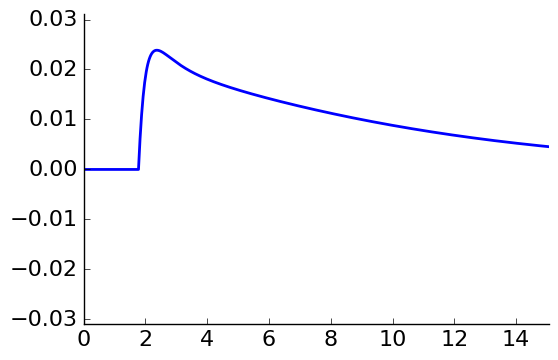

In [5]:
params_cell_file = os.path.join(dir_name, file_name) + '.json'
with file(params_cell_file, 'r') as fid:
    params_cell = json.load(fid)

results_cell = os.path.join(dir_name, file_name, 'cell', 'results', cell_file)
results = np.load(results_cell)

# access current at the synapses
synapse = results['ppt_vecs']

v_soma = results['v_soma']
dt = params_cell['timestep']
timeline = np.linspace(0, (len(v_soma))*dt, len(v_soma))
ax = plt.subplot(111)
plt.plot(timeline,synapse.T[:]*(-1),lw=2)
plt.ylabel('current at the synapse (nA)')
plt.xlabel('time')
plt.xlim([timeline[0], timeline[-1]])
plt.ylim([(np.max(np.abs(synapse))+np.max(np.abs(synapse))*0.3)*(-1), (np.max(np.abs(synapse))+np.max(np.abs(synapse))*0.3)])

plt.savefig(save_cell_figs_dir+'/synapses'+cell_file[:-4]+ext)
cplt.clean_plot(ax)
print 'saved fig: ' +save_cell_figs_dir+ '/synapses'+cell_file+ext